In [4]:
# Importing necessary library
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pandas as pd
import os
from scipy import signal
from stingray import lightcurve
import sys
from stingray import Bispectrum
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Define sampling frequency
fs = 256
t = np.arange(0, 1, 1/fs)

### Menghitung Bispectrum

In [19]:
def calcBispectrum(df_data, t, lag):
    # Compute the bispectrum of the signal
    lc = lightcurve.Lightcurve(t,df_data.T)
    bs = Bispectrum(lc, maxlag=lag)

    # Plot the bispectrum using contour plots
    plt.contour(bs.freq, bs.freq, bs.bispec_mag)
    plt.xlabel('f1')
    plt.ylabel('f2')
    plt.show()

    # Plot the bispectrum using mesh plots
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(bs.freq, bs.freq)
    ax.plot_surface(X, Y, bs.bispec_mag)
    ax.set_xlabel('f1')
    ax.set_ylabel('f2')
    ax.set_zlabel('Bispectrum')
    plt.show()

    return bs

### Persiapan data

In [3]:

def get_csv_EEG(filename):
    # Load data from CSV
    data = np.loadtxt(filename, delimiter=",", skiprows=1, usecols=range(3,259))
    channel_name = np.loadtxt(filename, delimiter=",", skiprows=1, usecols=1, dtype='str', encoding='utf-8')
    
    df_data = pd.DataFrame(data.T, columns=channel_name)

    df_data = df_data.drop(columns=['X', 'Y', 'nd'])

    return df_data, df_data.columns


### Perhitungan RWB

In [18]:
def extract_feature(directory, lag):
    for foldername in os.listdir(directory):
        folder = os.path.join(directory, foldername)
        if os.path.isdir(folder):
            des_dir = os.path.join(directory.replace('CSV', 'BISPECTRUM')+"_" + str(lag),foldername).lower()
            files = os.listdir(folder)
            for filename in files:
                rel_path = os.path.join(directory, foldername, filename)
                if 'metadata' in filename.lower():
                    continue
                trial_number = filename.split('.')[0].split('_')[1]
                df_data, channel_name = get_csv_EEG(rel_path)
                RWB = []
                for channel in channel_name:
                    bispectrum = calcBispectrum(df_data[channel], t, lag)
                    RWB = np.append(RWB, relative_energies)
                des_file = foldername+'_'+ str(trial_number) + '_feature' +'.csv'
                if not os.path.exists(des_dir):
                    os.makedirs(des_dir)
                des_path = os.path.join(des_dir, des_file)
                np.savetxt(des_path, RWB.T, delimiter =", ", fmt ='% s')
                # pd.DataFrame(RWB.T).to_csv(des_path, index=False)
        


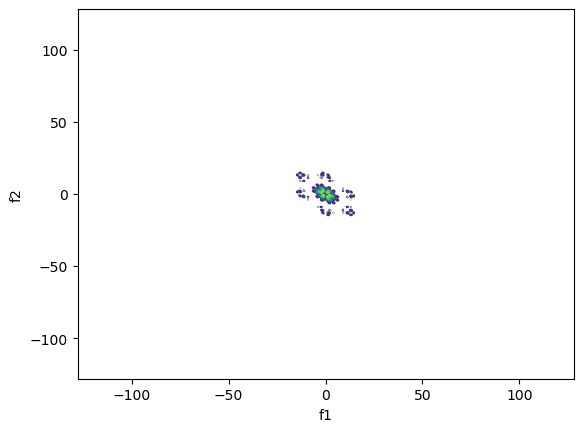

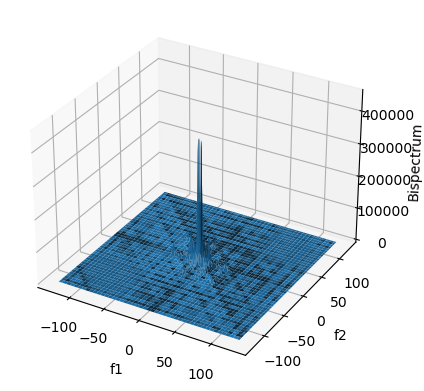

array([-128. , -127.5, -127. , -126.5, -126. , -125.5, -125. , -124.5,
       -124. , -123.5, -123. , -122.5, -122. , -121.5, -121. , -120.5,
       -120. , -119.5, -119. , -118.5, -118. , -117.5, -117. , -116.5,
       -116. , -115.5, -115. , -114.5, -114. , -113.5, -113. , -112.5,
       -112. , -111.5, -111. , -110.5, -110. , -109.5, -109. , -108.5,
       -108. , -107.5, -107. , -106.5, -106. , -105.5, -105. , -104.5,
       -104. , -103.5, -103. , -102.5, -102. , -101.5, -101. , -100.5,
       -100. ,  -99.5,  -99. ,  -98.5,  -98. ,  -97.5,  -97. ,  -96.5,
        -96. ,  -95.5,  -95. ,  -94.5,  -94. ,  -93.5,  -93. ,  -92.5,
        -92. ,  -91.5,  -91. ,  -90.5,  -90. ,  -89.5,  -89. ,  -88.5,
        -88. ,  -87.5,  -87. ,  -86.5,  -86. ,  -85.5,  -85. ,  -84.5,
        -84. ,  -83.5,  -83. ,  -82.5,  -82. ,  -81.5,  -81. ,  -80.5,
        -80. ,  -79.5,  -79. ,  -78.5,  -78. ,  -77.5,  -77. ,  -76.5,
        -76. ,  -75.5,  -75. ,  -74.5,  -74. ,  -73.5,  -73. ,  -72.5,
      

In [25]:
# extract_feature('../SMNI_CMI_TEST_CSV', 256)
df_data, channels = get_csv_EEG('../out.csv')
bs = calcBispectrum(df_data[channels[0]], t, 256)
bs.freq

In [17]:
bs.bispec_mag

array([[8.17878587e+00, 8.66990069e+00, 1.66136177e+01, ...,
        1.45770107e+01, 3.37833024e+00, 2.64311983e-12],
       [8.66990069e+00, 4.08153126e+00, 5.96602236e+00, ...,
        2.34622530e+00, 8.61891766e-13, 3.37833024e+00],
       [1.66136177e+01, 5.96602236e+00, 7.35670231e+00, ...,
        1.16628049e-12, 2.34622530e+00, 1.45770107e+01],
       ...,
       [1.45770107e+01, 2.34622530e+00, 4.46353842e-13, ...,
        7.35670231e+00, 5.96602236e+00, 1.66136177e+01],
       [3.37833024e+00, 4.17575705e-13, 2.34622530e+00, ...,
        5.96602236e+00, 4.08153126e+00, 8.66990069e+00],
       [1.66056151e-12, 3.37833024e+00, 1.45770107e+01, ...,
        1.66136177e+01, 8.66990069e+00, 8.17878587e+00]])